# Working With Rotation Poles

## 1. Finite Rotation Poles
A simple example to begin is to get the value of a finite rotation between two plates that should be in the rotation file (so we can check that it's right).

Here is the line from the rotation file defining the relative position of Australia wrt Antarctica at 40.1 Ma:

801    40.100  17.1000   30.6000  -23.6800  802 !  AUS-ANT An18 Muller et.al 1997

Here is the code to get this rotation using pygplates. Note that in the call to the function 'rotation_model.get_rotation', there are four input parameters
   1. the time to reconstruct to (40.1 Ma)
   2. the moving plate id (801 for Australia)
   3. the time to reconstruct from (0 for present day)
   4. the fixed plate id (802 for Antarctica)
   
The code should print the Lat,Long,Angle of the finite pole as shown above.

In [1]:
import pygplates
import numpy as np

input_rotation_filename = 'Data/Seton_etal_ESR2012_2012.1.rot'

rotation_model = pygplates.RotationModel(input_rotation_filename)


finite_rotation = rotation_model.get_rotation(40.1,801,0,802)
pole_lat,pole_lon,pole_angle = finite_rotation.get_lat_lon_euler_pole_and_angle_degrees()

print('Finite Pole Lat,Lon,Angle = %f,%f,%f ' % (pole_lat,pole_lon,pole_angle))


Finite Pole Lat,Lon,Angle = 17.100000,30.600000,-23.680000 


The finite pole can be calculated that describes the relative rotation of any plate relative to any other plate, at any time, so long as the reconstruction tree contains the right information to link the plates and interpolate rotations. For example, suppose we want a finite pole of rotation that describes the position of North America (plateid 101) relative to South America (plateid 201) at 102 Ma.  

In [2]:
finite_rotation = rotation_model.get_rotation(102,101,0,201)
pole_lat,pole_lon,pole_angle = finite_rotation.get_lat_lon_euler_pole_and_angle_degrees()

print('Finite Pole Lat,Lon,Angle = %f,%f,%f ' % (pole_lat,pole_lon,pole_angle))


Finite Pole Lat,Lon,Angle = -5.902556,-72.079111,-12.543588 


## 2. Stage Rotation Poles

Suppose you want to get the stage pole of rotation for a plate pair over a certain time range. To do this, we ultimately use the 'pygplates.get_equivalent_stage_rotation' function. Intermediate steps involve getting rotation models for the begin and end times of the time period, from whichever rotation file we want to work with.

Note that there are several other, similar functions for working with stage and finite rotations. Note also that many of the pygplates functions return more than just the 'Lat,Long,Angle' familiar from rotation files and desktop GPlates. So we have to use additional lines of code if we want to strip out certain values from the result.

In [3]:
fixed_plate = 0
moving_plate = 802
to_time = 50
from_time = 55

stage_rotation = rotation_model.get_rotation(to_time,moving_plate,from_time,fixed_plate)

print(stage_rotation)

pole_lat,pole_lon,pole_angle = stage_rotation.get_lat_lon_euler_pole_and_angle_degrees()

print('Stage Pole Lat,Lon,Angle = %f,%f,%f ' % (pole_lat,pole_lon,pole_angle))


(rot = (pole = (lat: -23.2114, lon: 8.76534) (which is antipodal to (lat: 23.2114, lon: -171.235)); angle = 2.15669 deg))
Stage Pole Lat,Lon,Angle = -23.211442,8.765338,2.156688 


### Stage Pole Sequences
Suppose you wanted to do this for a series of successive time intervals. A loop to calculate stage poles for stages 10 Myr in duration, from 100 Ma to present, would look something like this:

In [4]:
import numpy as np

time_step = 10
for time in np.arange(0,100,time_step):

    to_time = time
    from_time = time+time_step
    stage_rotation = rotation_model.get_rotation(float(to_time),moving_plate,float(from_time),fixed_plate)

    pole_lat,pole_lon,pole_angle = stage_rotation.get_lat_lon_euler_pole_and_angle_degrees()

    print('Time interval = ',time,'-',time+time_step,', Stage Pole Lat,Lon,Angle = %f,%f,%f ' % (pole_lat,pole_lon,pole_angle))
        

Time interval =  0 - 10 , Stage Pole Lat,Lon,Angle = -53.518883,17.279879,-1.486549 
Time interval =  10 - 20 , Stage Pole Lat,Lon,Angle = -63.294625,48.658606,-1.293258 
Time interval =  20 - 30 , Stage Pole Lat,Lon,Angle = -68.728563,-35.787409,-0.958611 
Time interval =  30 - 40 , Stage Pole Lat,Lon,Angle = -40.714249,-67.146713,-1.168771 
Time interval =  40 - 50 , Stage Pole Lat,Lon,Angle = -35.973249,42.583737,-1.417372 
Time interval =  50 - 60 , Stage Pole Lat,Lon,Angle = -23.803192,7.811241,4.701634 
Time interval =  60 - 70 , Stage Pole Lat,Lon,Angle = -59.605493,-75.279727,-1.552566 
Time interval =  70 - 80 , Stage Pole Lat,Lon,Angle = -16.480931,-45.676028,-2.323164 
Time interval =  80 - 90 , Stage Pole Lat,Lon,Angle = 9.932012,-39.197805,-3.847906 
Time interval =  90 - 100 , Stage Pole Lat,Lon,Angle = -37.493514,-48.220828,-2.542581 


### A Practical Example - PAC-WANT stage poles in the Cenozoic
One application of these values is to visualise the stability of stage poles describing the relative motion of two plates through time, and how this stability is influenced by noise in the reconstructions, as discussed by Iaffaldano et al (2012, Nat.Comm). Here we reproduce one of these examples, looking at relative motion between the Pacific and (West) Antarctic plates over the last ~45 Ma:


In [5]:
fixed_plate = 901
moving_plate = 804
time_step = 1

Lats = []
Longs = []
Angles = []

for time in np.arange(0,42,time_step):
    
    to_time = time
    from_time = time+time_step
    stage_rotation = rotation_model.get_rotation(float(to_time),moving_plate,float(from_time),fixed_plate)

    pole_lat,pole_lon,pole_angle = stage_rotation.get_lat_lon_euler_pole_and_angle_degrees()

    Lats.append(pole_lat)
    Longs.append(pole_lon)
    Angles.append(np.radians(pole_angle))
    
# These next lines are necessary becuase the answers come out in the northern hemisphere, 
# need to check convention
Longs = np.add(Longs,180.)
Lats = np.multiply(Lats,-1)


To visualise how the stage pole migrates through time, we can plot the sequence on a map. In this case we do two subplots that show the same stage pole sequence, with colour mapped to time on the left, and magnitude of angular velocity on the right.

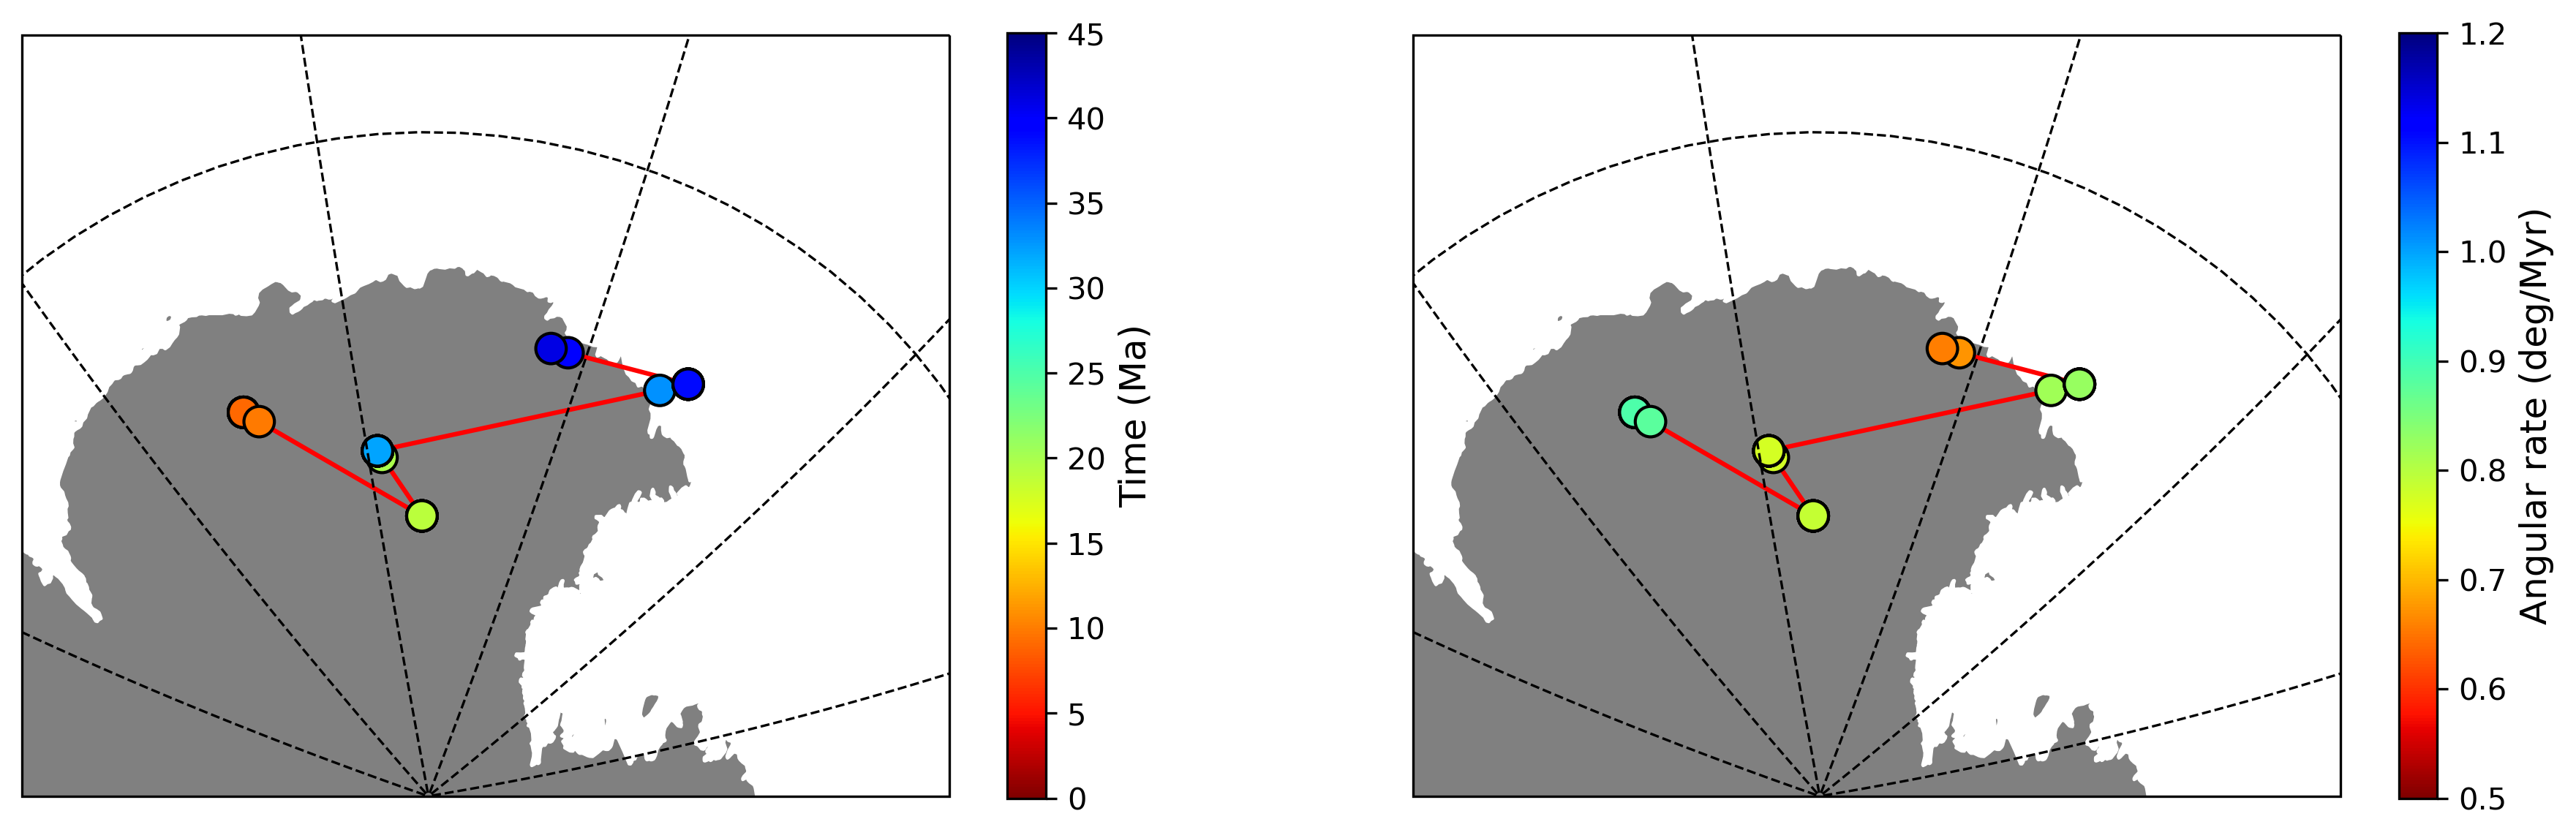

In [6]:
# Import all necessary packages
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
%matplotlib inline

# Make the figure and set a central latitude and longitude
fig = plt.figure(figsize=(15,6),dpi=300)
lat_0=-75. ; lon_0=130.

# First subplot - set lat,lon extents to focus on the Antarctic region
ax_map1 = fig.add_subplot(121,projection=ccrs.NearsidePerspective(central_longitude=lon_0, central_latitude=lat_0))
ax_map1.set_extent([100, 170, -90, -50])

# Draw meridians and parallels
ax_map1.gridlines(color='black',linestyle='--', xlocs=np.arange(-180,180,30), ylocs=np.arange(-90,90,30))

# Add land and ocean features
ax_map1.add_feature(cfeature.LAND, color = '0.5', edgecolor='0.5')
ax_map1.add_feature(cfeature.OCEAN, color='white')
ax_map1.add_feature(cfeature.LAKES, color='white', edgecolor='White')

# Plot the stage pole sequence; colour mapped for time
x,y = Longs,Lats
ax_map1.plot(x, y, 'r', transform=ccrs.PlateCarree(), zorder=1)
l3=ax_map1.scatter(x, y, 100, c=np.arange(0,42,time_step), transform=ccrs.PlateCarree(),
            cmap=plt.cm.jet_r,edgecolor='k',vmin=0,vmax=45, zorder=2)

# Create a colormap for this plot
fig.colorbar(l3, ax=ax_map1,shrink=0.77).set_label('Time (Ma)',fontsize=12)

# -----------------------------------------------------------------------------------------------------------------

# Second subplot - again, set lat,lon extents to focus on the Antarctic region
ax_map2 = fig.add_subplot(122,projection=ccrs.NearsidePerspective(central_longitude=lon_0, central_latitude=lat_0))
ax_map2.set_extent([100, 170, -90, -50])

# Draw meridians and parallels
ax_map2.gridlines(color='black',linestyle='--', xlocs=np.arange(-180,180,30), ylocs=np.arange(-90,90,30))

# Add land and ocean features
ax_map2.add_feature(cfeature.LAND, color = '0.5', edgecolor='0.5')
ax_map2.add_feature(cfeature.OCEAN, color='white')
ax_map2.add_feature(cfeature.LAKES, color='white', edgecolor='White')

# Plot the magnitude of stage pole angular velocity
x,y = Longs,Lats
ax_map2.plot(x, y, 'r', transform=ccrs.PlateCarree(), zorder=1)
l3=ax_map2.scatter(x, y, 100, c=np.degrees(Angles), transform=ccrs.PlateCarree(),
            cmap=plt.cm.jet_r, edgecolor='k', vmin=0.5,vmax=1.2, zorder=2)

# Create a colormap for this plot
fig.colorbar(l3, ax=ax_map2, shrink=0.77).set_label('Angular rate (deg/Myr)',fontsize=12)

# Show plot
plt.show()

This plot is comparable to figures S2 and S6 of Iaffaldano et al (2012). Note that the stage pole sequence from the Seton et al (2012) rotation file contains PAC-WANT rotations based on Cande et al (1995) at ~10 Myr intervals, so the reconstruction are inevitably less noisy than rotations from a high resolution data set (e.g. the ~1 Myr intervals derived by Croon et al 2008). On the other hand, subtle changes in plate motion over shorter timescales than ~10 Ma investigated by Iaffaldano will not be fully represented in the Seton et al (2012) files. 